In [299]:
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, AppLayout
from bqplot import pyplot as plt
import numpy as np
import pandas as pd
import qgrid

import warnings
warnings.filterwarnings("ignore")

# 1. Plots a bar graph representing the number of docstring errors.

To generate the file in `json` format, the following command needs to be executed in `master` branch clone of pandas,
after completing the development environment setup.

`./scripts/validate_docstrings.py --format=json > /path/to/json/pandas_docstring_errors.json`

This script currently supports pandas version >= 0.25.0

In [244]:
path = '../json/pandas_docstring_errors.json.zip'
df = (pd.read_json(path, compression='zip')
            .transpose()
            .filter(items=['errors'])
            .explode('errors')
            .dropna()
            .reset_index()
     )
df.head(2)

,index,errors
0,pandas.Categorical,"[PR01, Parameters {fastpath} not documented]"
1,pandas.Categorical,"[PR09, Parameter ""dtype"" description should fi..."


## 1) Split a list 'error' into separate data columns 'error_code' and 'error_name'

In [245]:
df[['error_code','error_name']] = pd.DataFrame(df.errors.tolist(), index=df.index)
df = df.drop(["errors","index"], axis=1)
df.head(2)

,error_code,error_name
0,PR01,Parameters {fastpath} not documented
1,PR09,"Parameter ""dtype"" description should finish wi..."


## 2) Draw a count plot of errors based on error_code

In [246]:
df_code = df['error_code'].value_counts().reset_index()
df_code.columns = ['error_code','counts']
df_code.head(2)

,error_code,counts
0,GL08,517
1,PR09,459


In [247]:
# Bar plot
def pd_countplot(df, x,y):
    df_plot=df.plot.bar(x, 
                y,
                legend=False,
                figsize=(8, 6))
    df_plot.set_ylabel("Counts")
    df_plot.set_xlabel("")
    return df_plot

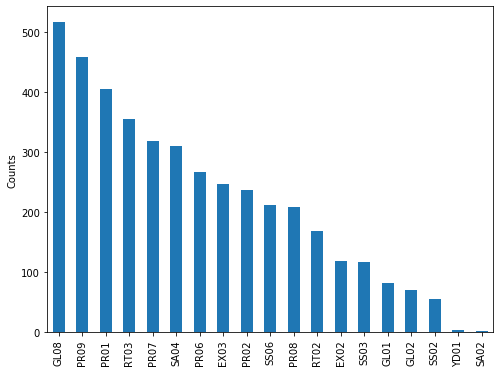

In [248]:
plot_code = pd_countplot(df_code, 'error_code','counts')

## 3) Check a frequency table of errors based on error_name

In [249]:
df_name= pd.DataFrame(df['error_name'].value_counts())
df_name.head(2)

,error_name
The object does not have a docstring,517
Return value has no description,355


# 2. Make a barplot using bqplot

In [250]:
# barplot function using bqplot
def bq_barplot(x,y,x_label =None,y_label=None):
    # x axis    
    x_ax = Axis(label=x_label, 
            scale=sc_ord,grid_lines='none',
            orientation='horizontal', 
            tick_rotate = -45,
            tick_style = {'text-anchor': 'end'}) 
    # y axis
    y_ax = Axis(label=y_label, 
            scale=y_sc_rf,  
            orientation='vertical', 
            grid_lines='none',
            label_location ='middle',
            label_offset ='50 px',
            tick_format='0f')
    # scales
    x_scale = OrdinalScale()
    y_scale = LinearScale()
    # bar chart
    bar_chart = Bars(x=data.error_code, 
                 y = data.counts,
                 scales={'x': x_scale, 'y': y_scale})
    # Figure
    fig = Figure(axes=[x_ax, y_ax], marks=[bar_chart]) 
    return fig 

code_barplot = bq_barplot(data.error_code,data.counts,'','Counts')
code_barplot

# 3. Make an editable table using qgrid

In [252]:
# Define qgrid widget
qgrid.set_grid_option('maxVisibleRows', 10)
col_opts = { 
    'editable': False,
}

In [253]:
def on_row_selected(change):
    """callback for row selection: update selected points in scatter plot"""
    filtered_df = qgrid_widget.get_changed_df()           
    team_scatter.selected = filtered_df.iloc[change.new].index.tolist()

# show_grid()    
qgrid_widget = qgrid.show_grid(df, show_toolbar=True, column_options=col_opts)
qgrid_widget.observe(on_row_selected, names=['_selected_rows'])
qgrid_widget.layout = widgets.Layout(width='920px')
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# 4. Interactive controls plot and table

## widgets

### 1) Filter data with slider

In [301]:
@interact
def show_errors_more_than(column='counts', x=100):
    df_code = df['error_code'].value_counts().reset_index()
    df_code.columns = ['error_code','counts']
    display(HTML(f'<h3>Showing error_codes with more than {x} {column}<h3>'))
    return df_code.loc[df_code[column] > x]
    
#qgrid_widget = qgrid.show_grid(df, show_toolbar=True, column_options=col_opts)
#qgrid_widget.observe(on_row_selected, names=['_selected_rows'])
#qgrid_widget.layout = widgets.Layout(width='920px')
 #  return qgrid_widget


interactive(children=(Text(value='counts', description='column'), IntSlider(value=100, description='x', max=30…

## 2) dropdown

In [287]:
#@interact
Dropdown(
    options=df_code.error_code.sort_values(),
    #value='2',
    description='Number:',
    disabled=False,
)



Dropdown(description='Number:', options=('EX02', 'EX03', 'GL01', 'GL02', 'GL08', 'PR01', 'PR02', 'PR06', 'PR07…

## 3) Dependent widgets

<IPython.core.display.Javascript object>


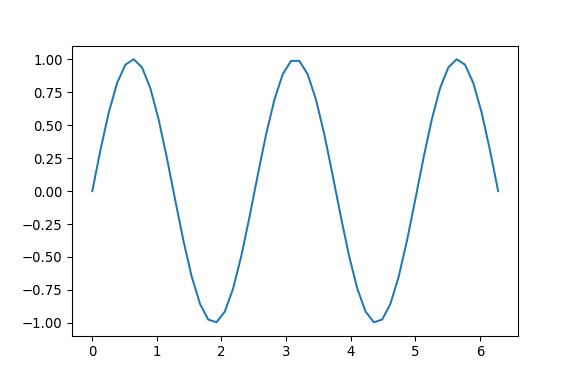

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [314]:
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))
@interact
def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

## 3) Layout

In [310]:
AppLayout(header=widgets.Text('layout'),
          left_sidebar= widgets.Text('layout left'),
          center=widgets.IntSlider(min=-5, max=5, value=1, description='Slider'),
          right_sidebar= widgets.Text('layout right'),
          grid_gap='20px',
          justify_items='center',
          align_items='center')

AppLayout(children=(Text(value='layout', layout=Layout(grid_area='header')), Text(value='layout left', layout=…

## 4.1 From barplot to table 
Click bar code ,
filer table using barcode 

## 4.2 From table to barplot
Click table code,
Show count 